<h1>Adquisición para la propuesta de proyecto.</h1>

Se toman dos imágenes que, relativamente, no presenten obstáculos como franjas de luz que impidan el conteo.

Se debe mencionar que hay algo de ruido por la escala en las imágenes. Lidiaremos con esto posteriormente.

In [1]:
%matplotlib inline
#importar librerias relevantes
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('res/Em 300 rpm F1.bmp',cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('res/Em 300 rpm F2.bmp',cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3 = cv2.imread('res/Em 300 rpm F3.bmp',cv2.IMREAD_COLOR)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img4 = cv2.imread('res/Em 300 rpm F5.bmp',cv2.IMREAD_COLOR)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

fig, (ax1,ax2) = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Imagenes utilizadas')
ax1[0].set_title('Imagen 1')
ax1[0].imshow(img1)
ax1[1].set_title('Imagen 2')
ax1[1].imshow(img2)
ax2[0].set_title('Imagen 3')
ax2[0].imshow(img3)
ax2[1].set_title('Imagen 4')
ax2[1].imshow(img4);


Inicialmente consideraremos los espacios de color RGB y HSV con la imágen 1 para hacernos una idea de cual es adecuado para el conteo.


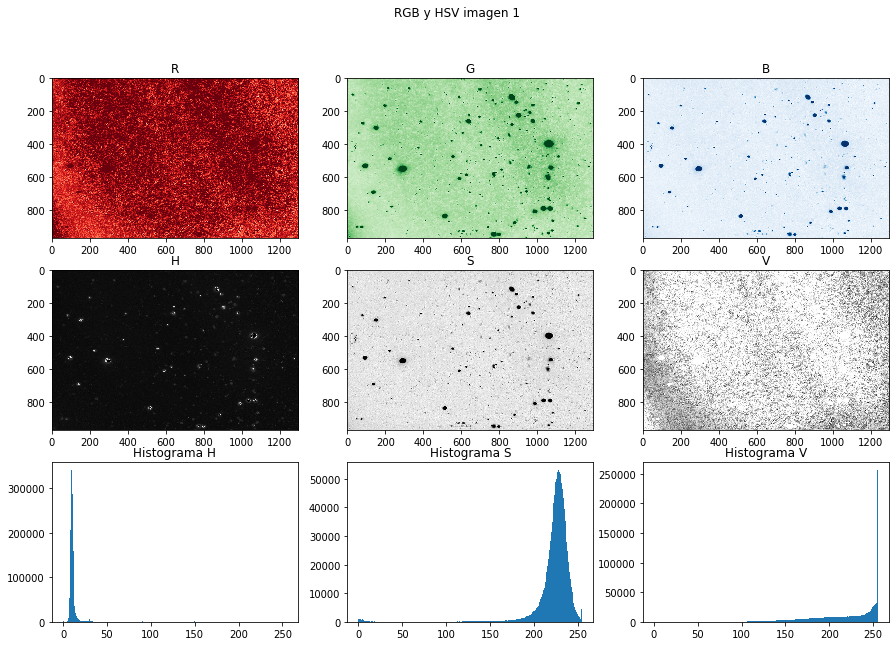

In [3]:
hsv1 = cv2.cvtColor(img1,cv2.COLOR_RGB2HSV)
fig, (ax1,ax2,ax3) = plt.subplots(3,3,figsize=(15,10))
fig.suptitle('RGB y HSV imagen 1')
ax1[0].set_title('R')
ax1[0].imshow(img1[:,:,0],cmap='Reds',aspect='auto')
ax1[1].set_title('G')
ax1[1].imshow(img1[:,:,1],cmap='Greens',aspect='auto')
ax1[2].set_title('B')
ax1[2].imshow(img1[:,:,2],cmap='Blues',aspect='auto')
ax2[0].set_title('H')
ax2[0].imshow(hsv1[:,:,0],cmap='gray',aspect='auto')
ax2[1].set_title('S')
ax2[1].imshow(hsv1[:,:,1],cmap='gray',aspect='auto')
ax2[2].set_title('V')
ax2[2].imshow(hsv1[:,:,2],cmap='gray',aspect='auto');
ax3[0].set_title('Histograma H')
raveled = hsv1[:,:,0].ravel()
ax3[0].hist(raveled,bins=256,range=(0.0,255.0))
ax3[1].set_title('Histograma S')
raveled = hsv1[:,:,1].ravel()
ax3[1].hist(raveled,bins=256,range=(0.0,255.0))
ax3[2].set_title('Histograma V')
raveled = hsv1[:,:,2].ravel()
ax3[2].hist(raveled,bins=256,range=(0.0,255.0));


plt.savefig('res/img1RGBGSV.png')


Los canales de S del HSV y B del RGB parecen ser adecuados a simple vista para la tarea de contar y medir.

En el canal azul podemos ver una mejor separación del fondo y del ruido de las gotas, así que probaremos con el canal B del espacio LAB.


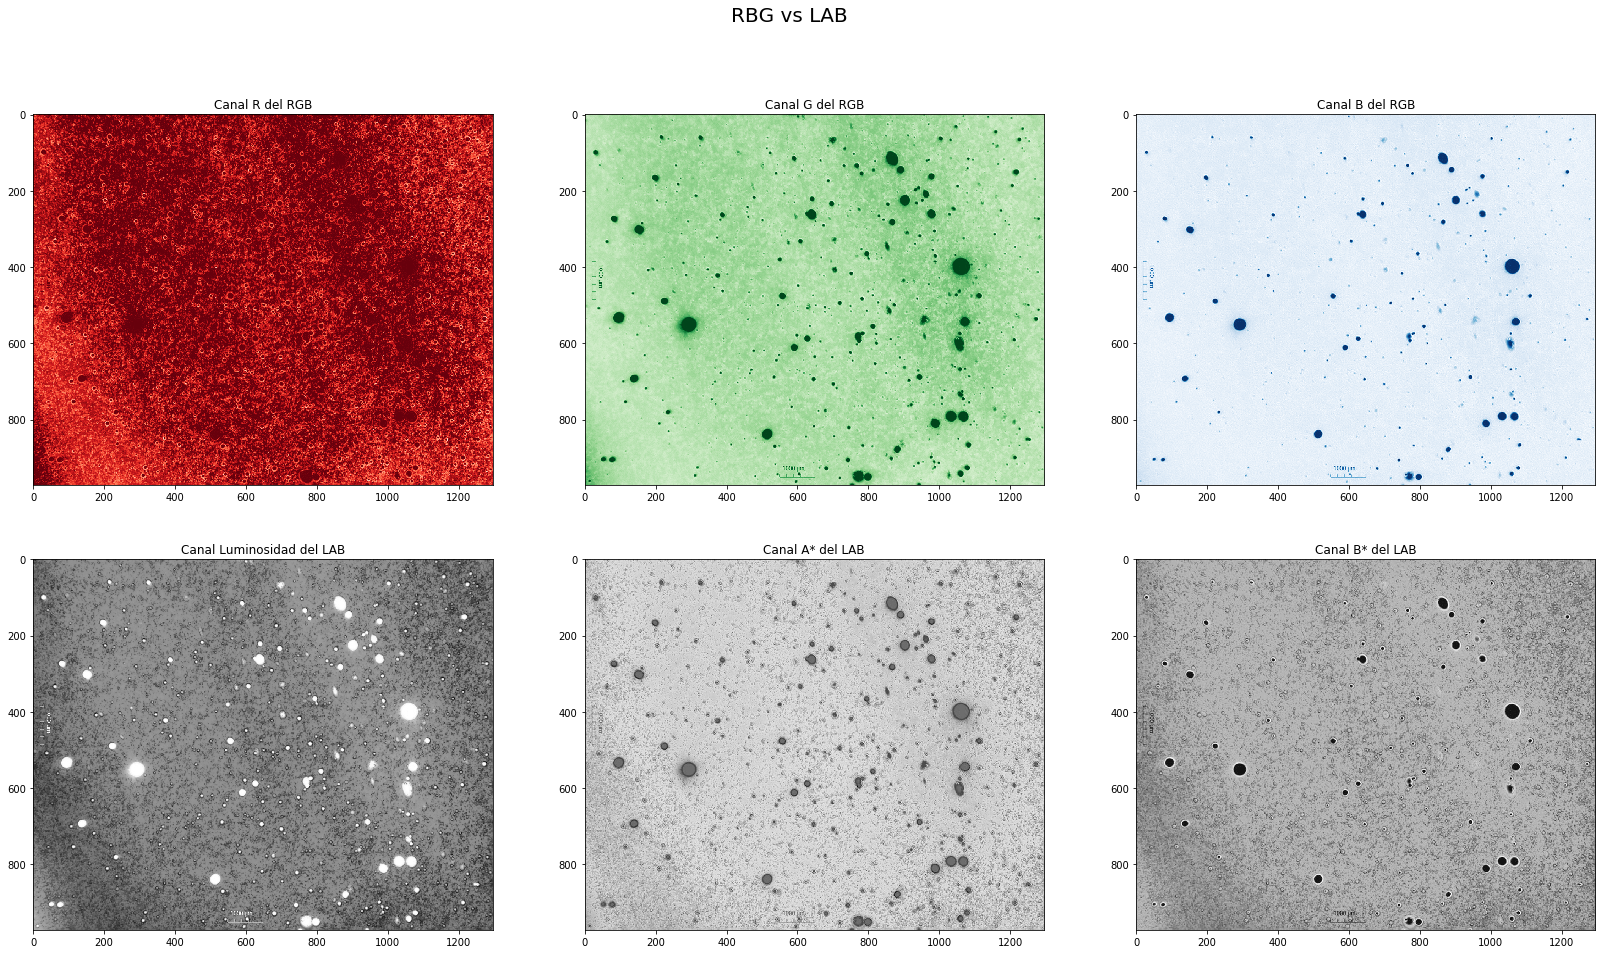

In [4]:
lab1 = cv2.cvtColor(img1,cv2.COLOR_RGB2LAB)
img_L = lab1[:,:,0]
img_A =  lab1[:,:,1]
img_B = lab1[:,:,2]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs LAB', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img1[:,:,0], cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img1[:,:,1], cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img1[:,:,2], cmap='Blues', aspect='auto')
ax4.set_title('Canal Luminosidad del LAB')
ax4.imshow(img_L, cmap='gray', aspect='auto')
ax5.set_title('Canal A* del LAB')
ax5.imshow(img_A, cmap='gray', aspect='auto')
ax6.set_title('Canal B* del LAB')
ax6.imshow(img_B, cmap='gray', aspect='auto')

plt.savefig('res/img1lab.png')

Con el proposito de comparar, los canales B de LAB y RGB en escala de grises.

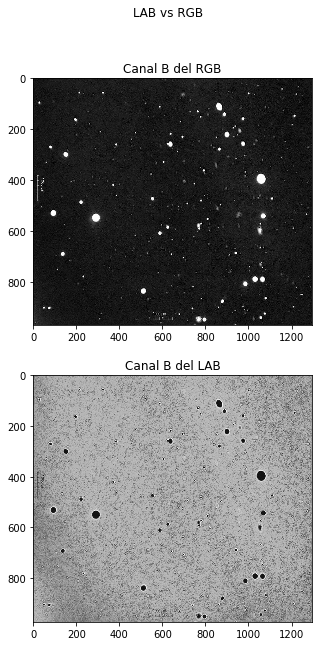

In [5]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,10))
fig.suptitle('LAB vs RGB')
ax1.set_title('Canal B del RGB')
ax1.imshow(img1[:,:,2], cmap='gray', aspect='auto')
ax2.set_title('Canal B del LAB')
ax2.imshow(lab1[:,:,2], cmap='gray', aspect='auto');

Invertiremos la imagen en el canal B del RGB para comparar mejor visibilidades.

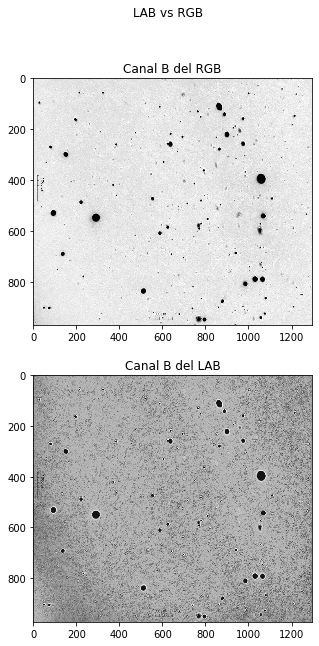

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,10))
fig.suptitle('LAB vs RGB')
ax1.set_title('Canal B del RGB')
ax1.imshow(255 - img1[:,:,2], cmap='gray', aspect='auto')
ax2.set_title('Canal B del LAB')
ax2.imshow(lab1[:,:,2], cmap='gray', aspect='auto');

Observamos que el canal B del RGB tiene mejor contraste con el fondo y menos ruido, lo que nos hace pensar que podria ser un punto de partida adecuado.

Existen algunas imagenes con algunos obstaculos que impidan la diferenciacion de las gotas, pero en esta imagen siguiente en particular consideramos que el canal B facilita el contraste de una gota sobre la franja de luz.

In [7]:
lab3 = cv2.cvtColor(img3,cv2.COLOR_RGB2LAB)


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,10))
fig.suptitle('Normal vs LAB (B)')
ax1.set_title('Normal')
ax1.imshow(img3, aspect='auto')
ax2.set_title('Canal B del LAB')
ax2.imshow(lab3[:,:,2], cmap='gray', aspect='auto');